### Importing Libraries

In [1]:
import os
from IPython import display
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2024-04-19 15:21:21.949113: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 15:21:22.128540: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-19 15:21:22.826586: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student/anaconda3/envs/tensorflow/lib/python3.10/site-packages/cv2/../../lib64:/h

### Data Processing

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-04-19 15:21:24.423447: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-19 15:21:24.445862: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-19 15:21:24.445987: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
data_dir = "../Dataset/train/4"

img_width, img_height = 224, 224
batch_size = 32

# Load all images from the folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, filename), target_size=(img_width, img_height))
        img_array = img_to_array(img)
        gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        img_tensor = tf.convert_to_tensor(gray)
        images.append(img_tensor)
    return np.array(images)

# Load images from the folder
train = load_images_from_folder(data_dir)

2024-04-19 15:21:25.007387: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 15:21:25.012614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-19 15:21:25.012719: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-19 15:21:25.012764: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0

In [4]:
train

array([[[125.      , 127.      , 127.      , ...,  48.      ,
          47.000004,  44.      ],
        [124.      , 125.99999 , 125.99999 , ...,  48.      ,
          47.000004,  43.      ],
        [124.      , 125.      , 125.      , ...,  49.      ,
          46.000004,  43.      ],
        ...,
        [ 94.00001 ,  94.00001 ,  93.      , ...,   0.      ,
           0.      ,   0.      ],
        [ 95.      ,  95.      ,  92.00001 , ...,   0.      ,
           0.      ,   0.      ],
        [ 96.      ,  96.      ,  93.      , ...,   0.      ,
           0.      ,   0.      ]],

       [[135.      , 135.      , 136.      , ..., 144.      ,
         141.      , 138.      ],
        [134.      , 135.      , 136.      , ..., 143.      ,
         141.      , 139.      ],
        [132.      , 135.      , 137.      , ..., 143.      ,
         140.      , 137.      ],
        ...,
        [ 13.      ,  17.      ,  19.      , ..., 174.      ,
         176.      , 173.      ],
        [ 13

In [5]:
train = (train - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [6]:
train

array([[[-0.01960784, -0.00392157, -0.00392157, ..., -0.62352943,
         -0.6313726 , -0.654902  ],
        [-0.02745098, -0.01176477, -0.01176477, ..., -0.62352943,
         -0.6313726 , -0.6627451 ],
        [-0.02745098, -0.01960784, -0.01960784, ..., -0.6156863 ,
         -0.6392157 , -0.6627451 ],
        ...,
        [-0.26274505, -0.26274505, -0.27058825, ..., -1.        ,
         -1.        , -1.        ],
        [-0.25490198, -0.25490198, -0.27843133, ..., -1.        ,
         -1.        , -1.        ],
        [-0.24705882, -0.24705882, -0.27058825, ..., -1.        ,
         -1.        , -1.        ]],

       [[ 0.05882353,  0.05882353,  0.06666667, ...,  0.12941177,
          0.10588235,  0.08235294],
        [ 0.05098039,  0.05882353,  0.06666667, ...,  0.12156863,
          0.10588235,  0.09019608],
        [ 0.03529412,  0.05882353,  0.07450981, ...,  0.12156863,
          0.09803922,  0.07450981],
        ...,
        [-0.8980392 , -0.8666667 , -0.8509804 , ...,  

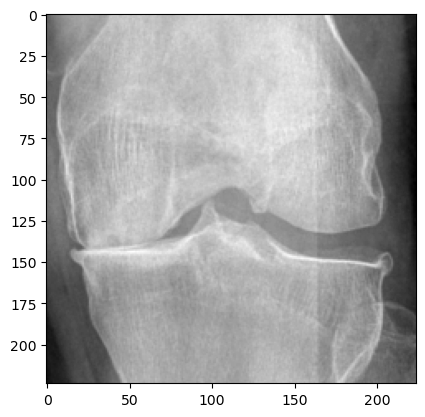

In [7]:
plt.imshow(train[5], cmap='gray')

### DCGAN

In [8]:
# Generator
# def build_generator(latent_dim):
#     input_noise = Input(shape=(latent_dim,))
#     x = Dense(7*7*256)(input_noise)
#     x = Reshape((7, 7, 256))(x)
#     x = Conv2DTranspose(128, kernel_size=5, strides=1, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = LeakyReLU(alpha=0.01)(x)
#     x = Conv2DTranspose(64, kernel_size=5, strides=2, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = LeakyReLU(alpha=0.01)(x)
#     x = Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh')(x)
#     generator = Model(input_noise, x)
#     return generator

def build_generator(latent_dim):
    input_noise = Input(shape=(latent_dim,))
    x = Dense(7*7*256)(input_noise)
    x = Reshape((7, 7, 256))(x)
    x = Conv2DTranspose(128, kernel_size=5, strides=4, padding='same')(x)  # Adjust the strides to upscale to 28x28
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = Conv2DTranspose(64, kernel_size=5, strides=4, padding='same')(x)  # Adjust the strides to upscale to 112x112
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh')(x)  # Adjust the strides to upscale to 224x224
    generator = Model(input_noise, x)
    return generator

# Discriminator
def build_discriminator(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=5, strides=2, padding='same')(input_image)
    x = LeakyReLU(alpha=0.01)(x)
    x = Conv2D(128, kernel_size=5, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model(input_image, x)
    return discriminator

# Combined model
def build_dcgan(generator, discriminator):
    discriminator.trainable = False
    input_noise = Input(shape=(latent_dim,))
    generated_image = generator(input_noise)
    validity = discriminator(generated_image)
    dcgan = Model(input_noise, validity)
    return dcgan

# Define the input shape and latent dimension
input_shape = (224, 224, 1)
latent_dim = 100

# Build the generator, discriminator, and DCGAN models
generator = build_generator(latent_dim)
discriminator = build_discriminator(input_shape)
dcgan = build_dcgan(generator, discriminator)

# Compile the discriminator and DCGAN models
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
dcgan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

In [9]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(224, 224))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [20]:
epochs = 100
batch_size = 64

seed = tf.random.normal([16, 100])

# Train the DCGAN model
for epoch in range(epochs):
    for batch in range(train.shape[0] // batch_size):
        # Train the discriminator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)
        real_images = train[np.random.randint(0, train.shape[0], batch_size)]
        discriminator_loss_real = discriminator.train_on_batch(real_images, np.ones(batch_size))
        discriminator_loss_fake = discriminator.train_on_batch(fake_images, np.zeros(batch_size))
        discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)
        
        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = dcgan.train_on_batch(noise, np.ones(batch_size))
    
    # Print the losses
    print(f"Epoch {epoch+1}/{epochs} - Discriminator Loss: {discriminator_loss} - Generator Loss: {generator_loss}")

2/2 [==============================] - 0s 7ms/step
Epoch 1/100 - Discriminator Loss: 4.613627642393112 - Generator Loss: 0.0001987045252462849
2/2 [==============================] - 0s 7ms/step
Epoch 2/100 - Discriminator Loss: 4.612939357757568 - Generator Loss: 0.0001939220237545669
2/2 [==============================] - 0s 6ms/step
Epoch 3/100 - Discriminator Loss: 4.616674095392227 - Generator Loss: 0.00019233423518016934
2/2 [==============================] - 0s 7ms/step
Epoch 4/100 - Discriminator Loss: 4.617214530706406 - Generator Loss: 0.00019053713185712695
2/2 [==============================] - 0s 7ms/step
Epoch 5/100 - Discriminator Loss: 4.614798814058304 - Generator Loss: 0.0001960972585948184
2/2 [==============================] - 0s 7ms/step
Epoch 6/100 - Discriminator Loss: 4.624387353658676 - Generator Loss: 0.00019549569697119296
2/2 [==============================] - 0s 6ms/step
Epoch 7/100 - Discriminator Loss: 4.612183898687363 - Generator Loss: 0.0001926279219333

2/2 [==============================] - 0s 9ms/step
Epoch 28/100 - Discriminator Loss: 4.666905581951141 - Generator Loss: 0.00017315743025392294
2/2 [==============================] - 0s 8ms/step
Epoch 29/100 - Discriminator Loss: 4.673080265522003 - Generator Loss: 0.0001727844646666199
2/2 [==============================] - 0s 9ms/step
Epoch 30/100 - Discriminator Loss: 4.685940802097321 - Generator Loss: 0.00017587142065167427
2/2 [==============================] - 0s 8ms/step
Epoch 31/100 - Discriminator Loss: 4.670348435640335 - Generator Loss: 0.0001745475165080279
2/2 [==============================] - 0s 8ms/step
Epoch 32/100 - Discriminator Loss: 4.684274643659592 - Generator Loss: 0.00017309788381680846
2/2 [==============================] - 0s 8ms/step
Epoch 33/100 - Discriminator Loss: 4.681309998035431 - Generator Loss: 0.00017419942014385015
2/2 [==============================] - 0s 9ms/step
Epoch 34/100 - Discriminator Loss: 4.681469559669495 - Generator Loss: 0.00017389

2/2 [==============================] - 0s 7ms/step
Epoch 56/100 - Discriminator Loss: 4.717357397079468 - Generator Loss: 0.0001559403899591416
2/2 [==============================] - 0s 5ms/step
Epoch 57/100 - Discriminator Loss: 4.7299811244010925 - Generator Loss: 0.00015608342073392123
2/2 [==============================] - 0s 6ms/step
Epoch 58/100 - Discriminator Loss: 4.726755440235138 - Generator Loss: 0.00015333236660808325
2/2 [==============================] - 0s 9ms/step
Epoch 59/100 - Discriminator Loss: 4.7297389805316925 - Generator Loss: 0.00015550458920188248
2/2 [==============================] - 0s 7ms/step
Epoch 60/100 - Discriminator Loss: 4.734047383069992 - Generator Loss: 0.00015867040201555938
2/2 [==============================] - 0s 9ms/step
Epoch 61/100 - Discriminator Loss: 4.737074285745621 - Generator Loss: 0.00015333323972299695
2/2 [==============================] - 0s 7ms/step
Epoch 62/100 - Discriminator Loss: 4.740291953086853 - Generator Loss: 0.00015

2/2 [==============================] - 0s 10ms/step
Epoch 83/100 - Discriminator Loss: 4.778204500675201 - Generator Loss: 0.0001439774059690535
2/2 [==============================] - 0s 8ms/step
Epoch 84/100 - Discriminator Loss: 4.772894442081451 - Generator Loss: 0.00013776333071291447
2/2 [==============================] - 0s 8ms/step
Epoch 85/100 - Discriminator Loss: 4.774811863899231 - Generator Loss: 0.0001486121618654579
2/2 [==============================] - 0s 7ms/step
Epoch 86/100 - Discriminator Loss: 4.780970394611359 - Generator Loss: 0.00013904424849897623
2/2 [==============================] - 0s 7ms/step
Epoch 87/100 - Discriminator Loss: 4.776505142450333 - Generator Loss: 0.00014174119860399514
2/2 [==============================] - 0s 7ms/step
Epoch 88/100 - Discriminator Loss: 4.787588328123093 - Generator Loss: 0.00013971331645734608
2/2 [==============================] - 0s 8ms/step
Epoch 89/100 - Discriminator Loss: 4.793751686811447 - Generator Loss: 0.0001388

In [21]:
generate_and_save_images(generator, epochs, seed)

In [9]:
# generator.save("Saved Models/Generator")
# discriminator.save("Saved Models/Discriminator")
# dcgan.save("Saved Models/DCGAN")